In [77]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.stats.mstats import winsorize
import seaborn as sns
import numpy as np
import plotly.express as px

# pd.options.mode.chained_assignment = None  # default='warn'


In [103]:
gdf = gpd.read_file('../../input/shapes/BA/29MUE250GC_SIR.shp')
all_nighttime_lights = pd.read_csv('../../model/coordinates_with_distances.csv')
pib_ba = pd.read_csv('../../model/pib_ba.csv')
income_ba = pd.read_csv('../../model/income_avg_ba.csv')
# all_nighttime_lights

# RADIANCE MAP

### WINSORIZATION - DETECT OUTLIERS

In [140]:
all_nighttime_lights = all_nighttime_lights[all_nighttime_lights['radiance'] > 0]
all_nighttime_lights['w_radiance'] = winsorize(all_nighttime_lights['radiance'],(0,0.001))
all_nighttime_lights[all_nighttime_lights['radiance'] > 0.7].sort_values('w_radiance', ascending=False)

,lat,long,radiance,city,city_code,dist_to_city,w_radiance,geometry
1695730,-12.904167,-38.437500,45.471670,SALVADOR,2927408,0.121614,39.034530,POINT (-38.43750 -12.90417)
1696766,-12.991667,-38.516666,71.301500,SALVADOR,2927408,0.036771,39.034530,POINT (-38.51667 -12.99167)
734524,-10.833333,-38.533333,50.989380,RIBEIRA DO POMBAL,2926608,0.004040,39.034530,POINT (-38.53333 -10.83333)
1696771,-12.991667,-38.495833,65.099205,SALVADOR,2927408,0.024377,39.034530,POINT (-38.49583 -12.99167)
734523,-10.833333,-38.537500,53.386303,RIBEIRA DO POMBAL,2926608,0.003261,39.034530,POINT (-38.53750 -10.83333)
...,...,...,...,...,...,...,...,...
1581330,-12.700000,-38.204166,0.700055,CAMAÇARI,2905701,0.121579,0.700055,POINT (-38.20417 -12.70000)
779340,-11.029167,-38.708333,0.700046,TUCANO,2931905,0.101152,0.700046,POINT (-38.70833 -11.02917)
1904609,-13.425000,-44.212500,0.700026,SÃO FÉLIX DO CORIBE,2929057,0.026002,0.700026,POINT (-44.21250 -13.42500)
885630,-11.141667,-39.145833,0.700006,ARACI,2902104,0.268027,0.700006,POINT (-39.14583 -11.14167)


### CONVERT LAT AND LONG TO GEO POINTS

In [141]:
all_gdf_points = gpd.GeoDataFrame(
      all_nighttime_lights, geometry=gpd.points_from_xy(all_nighttime_lights.long, all_nighttime_lights.lat))
all_gdf_points.sort_values(by='w_radiance', ascending=True, inplace=True)

### PLOT RADIANCE MAP

/var/folders/fx/kx7__pwn2tv9449n14s5rx1w0000gn/T/ipykernel_96280/167235976.py:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



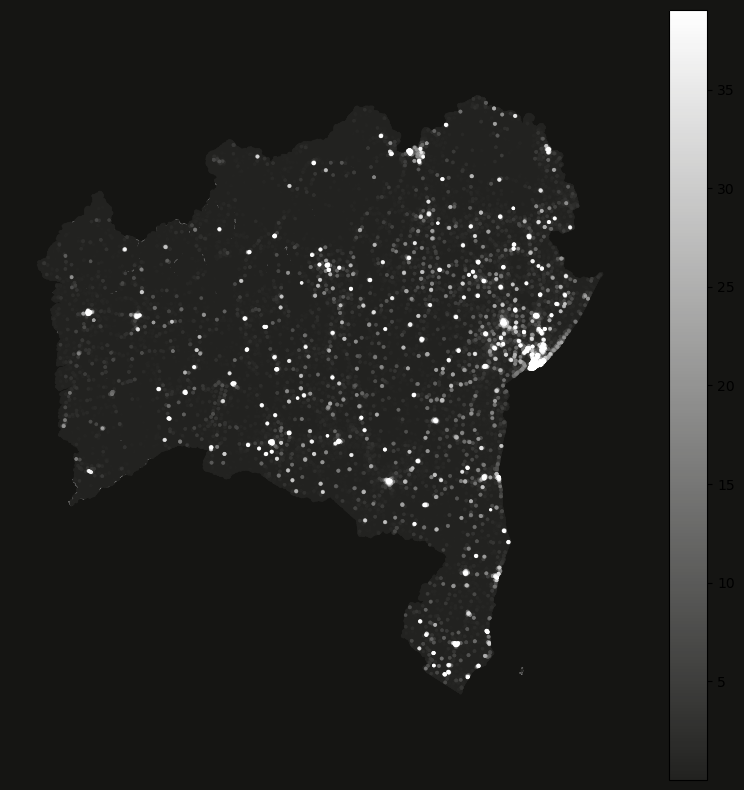

In [142]:

newcmp = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#222220", "white"])

fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax, color="#222220", edgecolor="grey", linewidth=0.4)
all_gdf_points.plot(column='w_radiance', 
                  ax=ax,
                  cmap=newcmp,
                #   plt.get_cmap("YlOrBr"),
                  markersize=2)

ax.axis('off')
vmin = all_gdf_points['w_radiance'].min()
vmax = all_gdf_points['w_radiance'].max()
fig.patch.set_facecolor('#151513')

# Create colorbar
sm = plt.cm.ScalarMappable(cmap=newcmp, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# CENSUS DATA

### CORRELATION - SCATTER PLOT

#### AVG RADIANCE AND MERGES

In [131]:
avg_radiance = all_nighttime_lights.groupby(by='city_code').mean().reset_index()[['city_code', 'radiance']]
data = avg_radiance.merge(pib_ba, on='city_code', how='inner')
data = data.merge(income_ba, on='city_code', how='inner')
data

/var/folders/fx/kx7__pwn2tv9449n14s5rx1w0000gn/T/ipykernel_96280/1046599877.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,city_code,radiance,pib,population,pib_per_capta,income,city,state
0,2900108,0.221977,34564.0,8687,3.979,320.46,Abaíra,BA
1,2900207,0.087996,60849.0,17380,3.501,270.40,Abaré,BA
2,2900306,0.662878,84408.0,14692,5.745,309.90,Acajutiba,BA
3,2900355,0.285629,92381.0,15810,5.843,248.93,Adustina,BA
4,2900405,0.245288,61826.0,15809,3.911,254.14,Água Fria,BA
...,...,...,...,...,...,...,...,...
412,2933307,0.746738,3506824.0,310129,11.308,646.35,Vitória da Conquista,BA
413,2933406,0.170034,40669.0,8984,4.527,337.08,Wagner,BA
414,2933455,0.106261,67018.0,12420,5.396,329.32,Wanderley,BA
415,2933505,0.157865,162451.0,22047,7.368,319.54,Wenceslau Guimarães,BA


#### SCATTER PLOT

<AxesSubplot: xlabel='radiance', ylabel='income'>

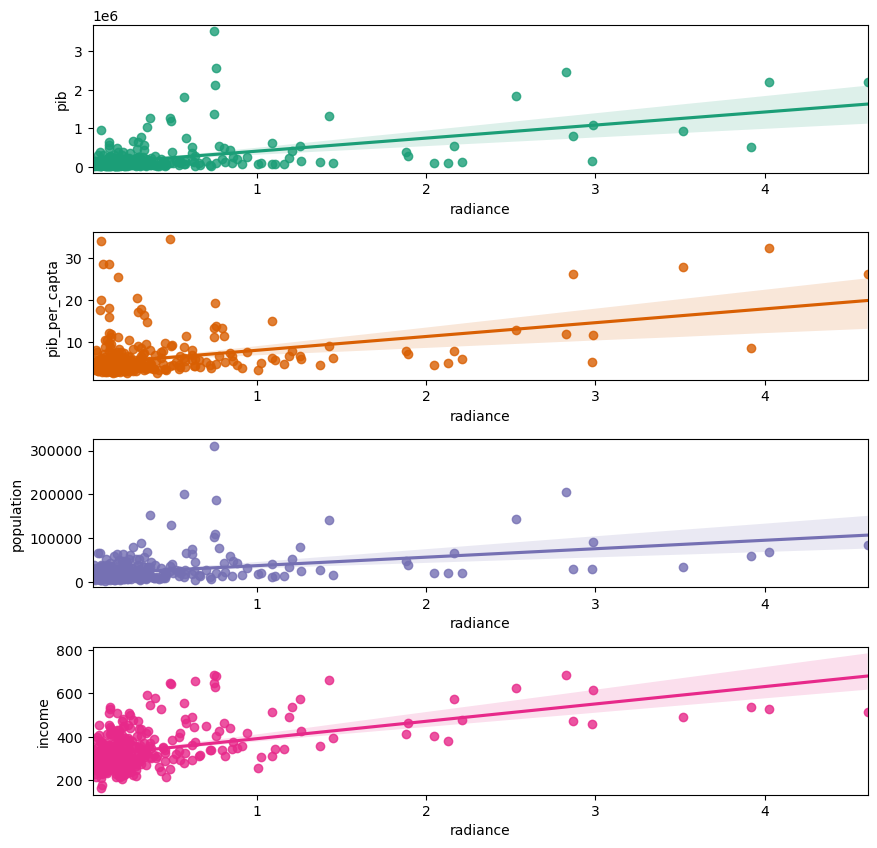

In [132]:
# REMOVE OUTLIERS (Z-SCORE)
threshold = 3
outlier_pib = []
outlier_income = []
outlier_radiance = []
for i, row in data.iterrows():
    z_pib = (row['pib_per_capta'] - np.mean(data['pib_per_capta'])) / np.std(data['pib_per_capta'])
    z_income = (row['income'] - np.mean(data['income'])) / np.std(data['income'])
    z_radiance = (row['radiance'] - np.mean(data['radiance'])) / np.std(data['radiance'])
    if z_pib > threshold:
        outlier_pib.append(row['pib_per_capta'])
    if z_income > threshold:
        outlier_income.append(row['income'])
    if z_radiance > threshold:
        outlier_radiance.append(row['radiance'])
# print('outlier in dataset is', outlier_pib)
# print('outlier in dataset is', outlier_income)
# print('outlier in dataset is', outlier_radiance)
newdata = data[(~data['pib_per_capta'].isin(outlier_pib)) & (~data['income'].isin(outlier_income)) & (~data['radiance'].isin(outlier_radiance))]
newdata
fig, axs = plt.subplots(nrows=4, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

sns.regplot(x=newdata["radiance"], y=newdata["pib"], ax=axs[0], scatter_kws={"color": "#1b9e77"}, line_kws={"color": "#1b9e77"})
sns.regplot(x=newdata["radiance"], y=newdata["pib_per_capta"], ax=axs[1], scatter_kws={"color": "#d95f02"}, line_kws={"color": "#d95f02"})
sns.regplot(x=newdata["radiance"], y=newdata["population"], ax=axs[2], scatter_kws={"color": "#7570b3"}, line_kws={"color": "#7570b3"})
sns.regplot(x=newdata["radiance"], y=newdata["income"], ax=axs[3], scatter_kws={"color": "#e7298a"}, line_kws={"color": "#e7298a"})

### HEAT MAPS

In [241]:
data['w_radiance'] = winsorize(data['radiance'],(0,0.01))
data['w_pib'] = winsorize(data['pib'],(0,0.01))
data['w_population'] = winsorize(data['population'],(0,0.01))
data['w_income'] = winsorize(data['income'],(0,0.01))
data.sort_values('population', ascending=False)
# data

,city_code,radiance,pib,population,pib_per_capta,income,city,state,w_radiance,w_pib,w_population,w_pib_per_capta,w_income
335,2927408,16.618518,40762687.0,2693606,15.133,1069.79,Salvador,BA,6.068192,3652178.0,205286,15.133,718.59
130,2910800,3.100447,7179906.0,562466,12.765,761.42,Feira de Santana,BA,3.100447,3652178.0,205286,12.765,718.59
412,2933307,0.746738,3506824.0,310129,11.308,646.35,Vitória da Conquista,BA,0.746738,3506824.0,205286,11.308,646.35
70,2905701,5.738963,12446027.0,249206,49.943,632.27,Camaçari,BA,5.738963,3652178.0,205286,28.488,632.27
176,2914802,2.828002,2444702.0,205286,11.909,682.36,Itabuna,BA,2.828002,2444702.0,205286,11.909,682.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2919009,0.164336,22862.0,3908,5.850,248.47,Lajedinho,BA,0.164336,22862.0,3908,5.850,248.47
121,2910206,0.638764,17237.0,3884,4.438,374.71,Dom Macedo Costa,BA,0.638764,17237.0,3884,4.438,374.71
222,2918704,0.081202,19609.0,3865,5.073,327.79,Lafaiete Coutinho,BA,0.081202,19609.0,3865,5.073,327.79
225,2918902,0.133871,33220.0,3758,8.840,528.40,Lajedão,BA,0.133871,33220.0,3758,8.840,528.40


In [234]:
# data['city_code']
gdf['CD_GEOCMU'] = gdf['CD_GEOCMU'].astype(int)
merged = gdf.merge(data, left_on=['CD_GEOCMU'], right_on=['city_code'])
# merged
# gdf


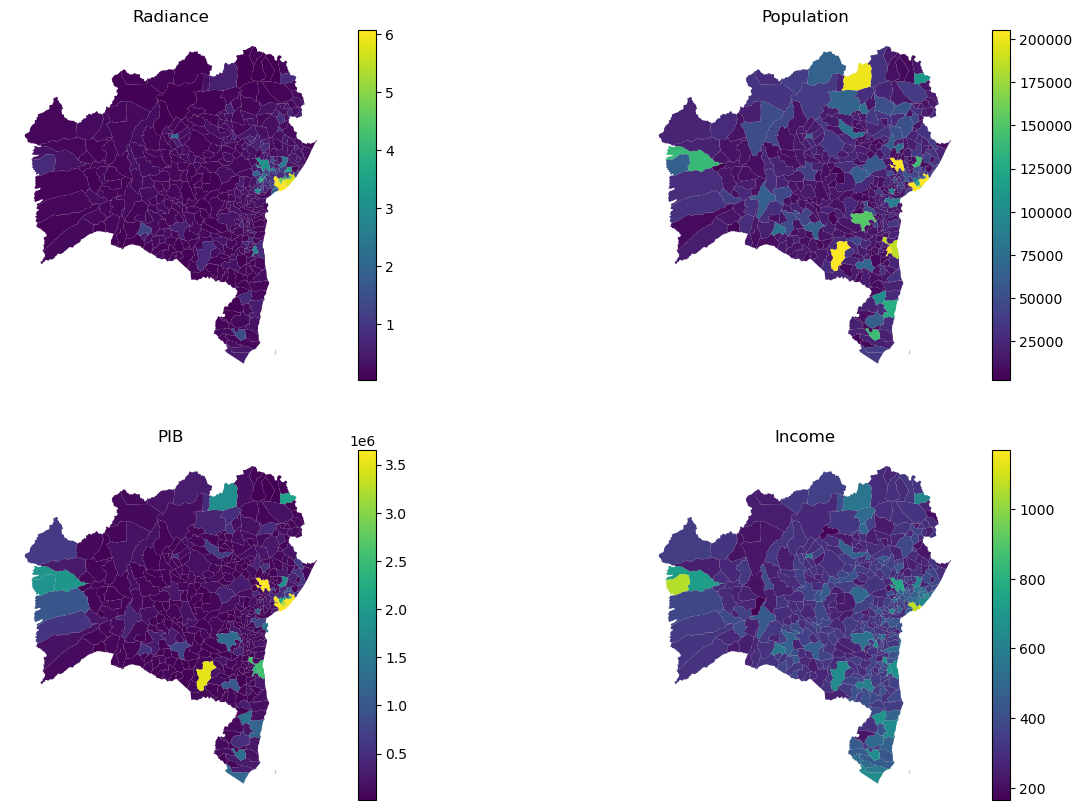

In [240]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

radiance = axs[0][0]
population = axs[0][1]
pib = axs[1][0]
income = axs[1][1]

merged.plot(column='w_radiance', cmap='viridis', linewidth=0.01, ax=radiance, edgecolor='0.1', legend = True)
radiance.title.set_text('Radiance')
radiance.set_axis_off()

merged.plot(column='w_population', cmap='viridis', linewidth=0.01, ax=population, edgecolor='0.1', legend = True)
population.title.set_text('Population')
population.set_axis_off()

merged.plot(column='w_pib', cmap='viridis', linewidth=0.01, ax=pib, edgecolor='0.1', legend = True)
pib.title.set_text('PIB')
pib.set_axis_off()

merged.plot(column='income', cmap='viridis', linewidth=0.01, ax=income, edgecolor='0.1', legend = True)
income.title.set_text('Income')
income.set_axis_off()

In [27]:
# TODO:
# - hotmap sobre pib
# - hotap sobre populacao
# - hotmap sobre income